<a href="https://colab.research.google.com/github/toluoludemi/DataSciencePortfolio/blob/main/Tolulope_Oludemi%20-%20Notebook%20%231%20-%20Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Predicting Fraudulent Transactions Using Machine Learning - Data Preparation and Exploratory Data Analysis (EDA)

## Author: Tolulope Acquah

---

## Problem Statement

**Using machine learning on credit card transactions, can I create a model that predicts fraudulent transactions to allow financial institutions to provide protection to their customer's finances, improving their service, and overall business growth?**

---

## Source of Data

---

The dataset is a simulated credit card transaction dataset generated using Sparkov Data Generation tool from Github. The tool was created by Brandon Harris. The simulator has pre-defined list of merchants, customers, and transaction categories. It also had profiles of different categories of people (i.e. adult females in the range of 25-50) with their transactions.

Using this tool, a Kaggle user generated transactions across all profiles and merged them together to create a more realistic representation of the simulated transactions. I downloaded the dataset from the Kaggle user.

Links of generator and dataset on Kaggle:
- Sparkov Data Generation: https://github.com/namebrandon/Sparkov_Data_Generation
- Kaggle Dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection

## Data Preparation and EDA

---
In this notebook, I will be loading the raw dataset from the source, conduct data cleaning where applicable, and dive into exploratory data analysis to see if I can get any insights from the data prior to pre-processing and modeling.


### Data Dictionary

---

Before moving forward with the purpose of this notebook, I will take some time to understand the data dictionary.

**Customer Data :**

Information Type | Data Description | Data Type | Column Name
---------------- |-----------       |-------    | ----------
Credit Card Number | The credit card number of the customer       | Numeric    | `cc_num`
First Name    | The first name of the customer      | Categorical    | `first`
Last Name | The last name of the customer | Categorical | `last`
Gender | The gender of the customer (male or female) | Categorical | `gender`
Street | The street address of the customer | Categorical | `street`
City | The city where the customer lives | Categorical | `city`
State | The state where the customer lives | Categorical | `state`
Zip Code | The zip code of the customer's location | Numeric | `zip`
Latitude | The latitude of the customer's location | Numeric | `lat`
Longitude | The longitude of the customer's location | Numeric | `long`
City Population | The city population of the customer's location | Numeric | `city_pop`
Job Title | The job title of the customer | Categorical | `job`
Date of Birth | The customer's date of birth | Categorical | `dob`

**Transaction Data :**

Information Type    | Data Description          | Data Type   | Column Name
----------------    |-----------                |-------      | ----------
Transaction Date and Time  | The date and time stamp when the transaction was made       | Categorical    | `trans_date_trans_time`
Amount | The amount spent on the transaction | Numeric | `amt`
Transaction Number | Unique number for each transaction | Categorical | `trans_num`
Fraud Identification | Identifying if the transaction was fraudulent or not | Nuneric | `is_fraud`


**Merchant Data:**

Information Type    | Data Description          | Data Type   | Column Name
----------------    |-----------                |-------      | ----------
Merchant Name  | The store where the transaction was made       | Categorical    | `merchant`
Category | The category of the item(s) bought (i.e. online shopping, groceries using the POS machine, etc.) | Categorical | `category`
Latitude of Merchant | The latitude of where the store is located | Numeric | `merch_lat`
Longitude of Merchant | The longitude of where the store is located | Numeric | `merch_long`


**The target of interest is the `is_fraud` column, identifying if the transaction made was fraudulent or not**

# Data Cleaning

## 1. Import Libraries and Dataset

In [210]:
# import necessary libraries

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [211]:
# Using GoogleColab so I need to set a path for where the data is located

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
# Read in the dataset

cc_trans_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/fraudTrain.csv", index_col=0)


# Inspect the data
cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## 2. Explore The Data

In [213]:
# See the shape of the dataset

cc_trans_df.shape

(1296675, 22)

There are 1,296,675 rows and 22 columns in the dataset.

In [214]:
# Check datatypes and format

cc_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

There are 10 columns that have numerical values (with floats and integers), and 12 columns that are considered categorical with "object" data type. By visually inspecting, the data type, there are a few columns that would need to be converted.

In [215]:
# See the class distribution

cc_trans_df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

Since `is_fraud` is the target variable, identifying if the transactions are fraudulent (class 1) or not fraudulent (class 0), I did a `value_counts` to see the distribution of the classes.

It is clear that there is an extreme class imbalance, with class 0 taking up 99% of the data. This information will be useful for modeling.

In [216]:
# Checking for duplicates

cc_trans_df.duplicated().sum()

0

There are no duplicated rows.

In [217]:
# Checking for null values

cc_trans_df.isna().sum().sum()

0

There are also no null values in the dataset.

In [218]:
# Visually inspecting to see if there are duplicates within the columns

cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


By visually inspecting the dataset, it doesn't look like information is duplicated in the columns.

## 3. Converting Date Columns to DateTime

As stated previously, the `trans_date_trans_time` and `dob` columns are "object" and these need to be changed to a `datetime64` format.

In [219]:
# Converting the 'trans_date_trans_time' and 'dob' columns
cc_trans_df['trans_date_trans_time'] = cc_trans_df['trans_date_trans_time'].astype('datetime64')

cc_trans_df['dob'] = cc_trans_df['dob'].astype('datetime64')

cc_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

# Data Exploration and Visualization

Now that the dataset has been cleaned and formatted, the next step is to explore the relationship between the target (`is_fraud`) and features.

In [220]:
# To see the percentage of fraudulent and non-fraudulent transactions

(cc_trans_df['is_fraud'].value_counts() / cc_trans_df.shape[0]) *100

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64

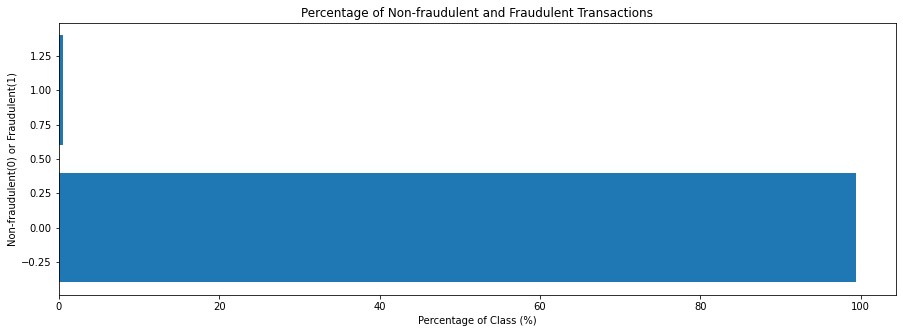

In [221]:
# Put the percentage in a bar plot

prop_fraud_trans = cc_trans_df['is_fraud'].value_counts() / cc_trans_df.shape[0]

plt.figure(figsize=(15,5))
plt.barh(prop_fraud_trans.index, prop_fraud_trans.values*100)
plt.xlabel("Percentage of Class (%)")
plt.ylabel("Non-fraudulent(0) or Fraudulent(1)")
plt.title("Percentage of Non-fraudulent and Fraudulent Transactions")

plt.show()

The figure shows that 99.4% of the data is identified as Class "0", which is non-fraudulent transactions. About 0.6% of the data is Class "1", which is fraudulent transactions. This means that the there is an extreme class imbalance in this dataset. This could affect the model's recall and precision, so during Pre-Processing I would have to find a way to balance these out as much as I can.

---

I want to check that the numeric columns do not contain suspicious values. I will use `describe` to get a breakdown of the summary characteristics for the numeric columns.

In [222]:
# Get breakdown of the summary statistics

cc_trans_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


There does not appear to be any suspicious numbers in the dataset, and it is observed that all the numeric variables have the same number of occurrences in the dataset.

## Categorical Columns


There were a lot of columns that had an 'object' data type when I used the `info()` function. This means that these columns are categorical variables. I want to visually inspect what they look like before it is transformed to numerical variable prior to modeling.

In [223]:
# Save all the categorical columns in one dataframe

categorical_columns = cc_trans_df.select_dtypes("object")
categorical_columns.head()

,merchant,category,first,last,gender,street,city,state,job,trans_num
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46


In [224]:
# Check the shape of the categorical columns dataframe

categorical_columns.shape

(1296675, 10)

There are 10 categorical columns with the same number of rows as the original dataset - a little under 1.3 million.

---

The first thing I noticed off the bat is that the merchant column has 'fraud_' before the merchant. It would be easier to read if that wasn't there. So, I will remove it.

In [225]:
# Change the format of the `merchant` information and remove the "fraud_"

cc_trans_df['merchant'] = cc_trans_df['merchant'].str[6:]
cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Now that the `merchant` column has been formatted appropriately, I will go back to analyzing the categorical columns.

In [226]:
categorical_columns = cc_trans_df.select_dtypes("object")
categorical_columns.head()

,merchant,category,first,last,gender,street,city,state,job,trans_num
0,"Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9
1,"Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99
2,Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95
3,"Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81
4,Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46


That looks better. I notice that the `trans_num` column has a mix of numbers and letters. I want to see if this column is unique to each transaction (which is every row), if it is, it can be dropped since each transaction has it's own index.

In [227]:
# Checking value counts for the trans_num column
categorical_columns['trans_num'].value_counts()

0b242abb623afc578575680df30655b9    1
c85864e7e7cf0be6d1b8597977b8afea    1
1a8a2a05638a5503cc6bb8d5735efcc1    1
4556eaf1f7def06eb500325cde4d054e    1
5e915d9f88bd09cee9655a470d9bc0bd    1
                                   ..
2d1aa5b21a993788ac19b697598ca44c    1
b50dd4b47d1ad877874661afba6eb7f6    1
5ce4e974bf15b7d9f133c6eedb81ceb1    1
64d601ddeaf4eba8b191bd1859998209    1
8f7c8e4ab7f25875d753b422917c98c9    1
Name: trans_num, Length: 1296675, dtype: int64

There are 1,296,675 unique numbers of the `trans_num`, which is the total number of rows in the dataset.
- The `trans_num` is unique to each row, meaning this column can be dropped during pre-processing.

In [228]:
# Dropping the trans_num column

cc_trans_df.drop('trans_num', axis=1, inplace=True)
cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


Now that the `trans_num` column has been dropped. I want to check the `value_counts` for each categorical column, to see if there are any insights I can retreive.

In [229]:
# Re-define the categorical columns to include the new changes

categorical_columns = cc_trans_df.select_dtypes("object")

In [230]:
categorical_columns.shape

(1296675, 9)

To save time, I will use a for loop to plot the value counts for every column in the categorical columns dataframe.

In [231]:
list(enumerate(categorical_columns, start=1))

[(1, 'merchant'),
 (2, 'category'),
 (3, 'first'),
 (4, 'last'),
 (5, 'gender'),
 (6, 'street'),
 (7, 'city'),
 (8, 'state'),
 (9, 'job')]

In [232]:
categorical_columns['merchant'].value_counts().head(10)

Kilback LLC                   4403
Cormier LLC                   3649
Schumm PLC                    3634
Kuhn LLC                      3510
Boyer PLC                     3493
Dickinson Ltd                 3434
Cummerata-Jones               2736
Kutch LLC                     2734
Olson, Becker and Koch        2723
Stroman, Hudson and Erdman    2721
Name: merchant, dtype: int64

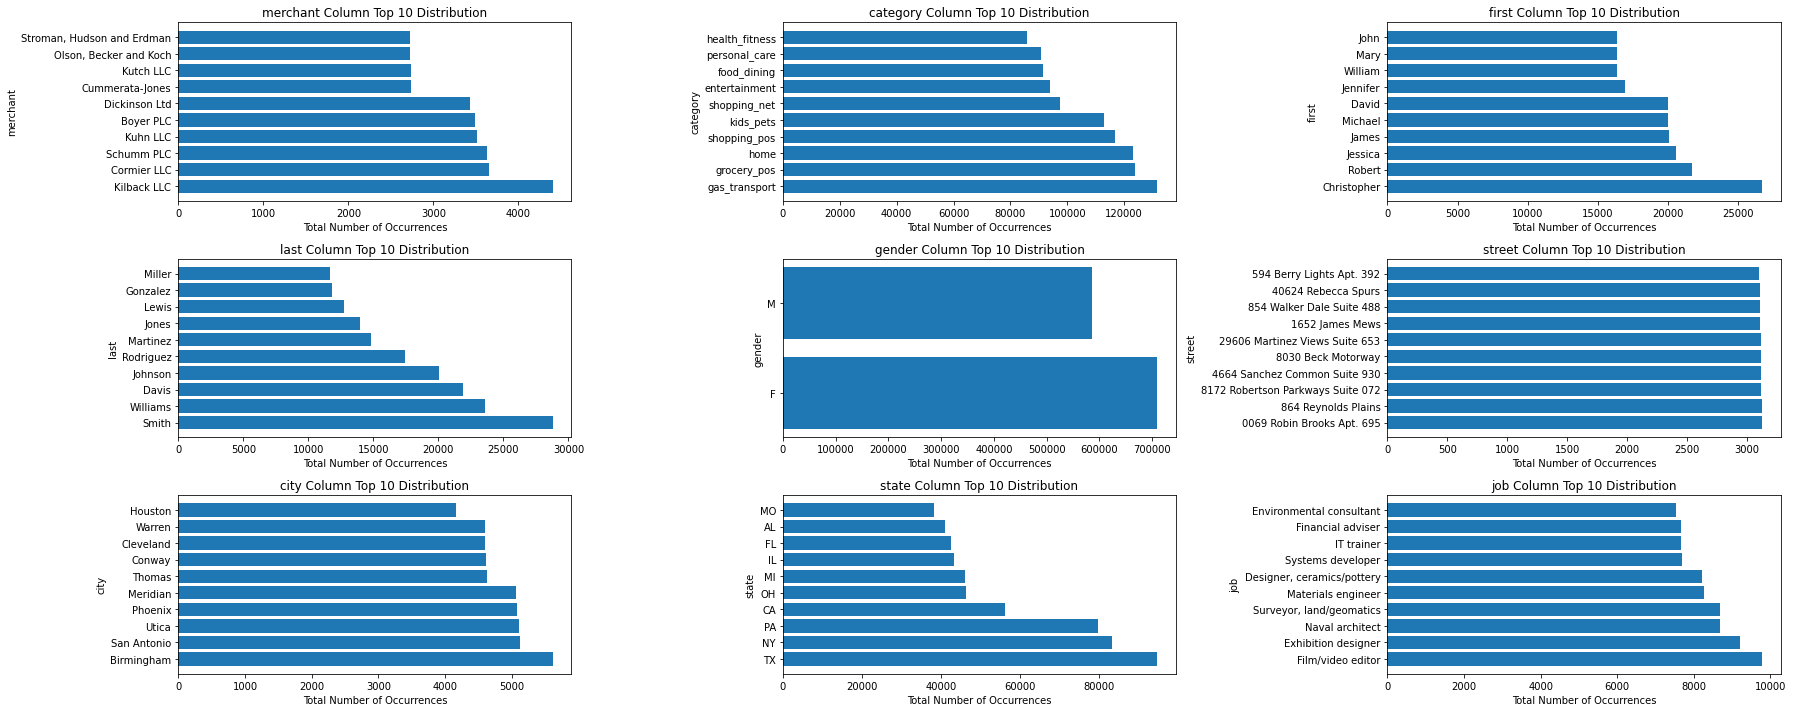

In [233]:
# For the top 10 categorical variables based on their value counts

plt.subplots(3,3, figsize=(25,10))

for slot_num, each_col in enumerate(categorical_columns, start=1):

  plt.subplot(3,3,slot_num)
  plt.barh(categorical_columns[each_col].value_counts().head(10).index,
           categorical_columns[each_col].value_counts().head(10).values)
  
  plt.xlabel("Total Number of Occurrences")
  plt.ylabel(each_col)
  plt.title(f"{each_col} Column Top 10 Distribution")

plt.tight_layout()
plt.show()

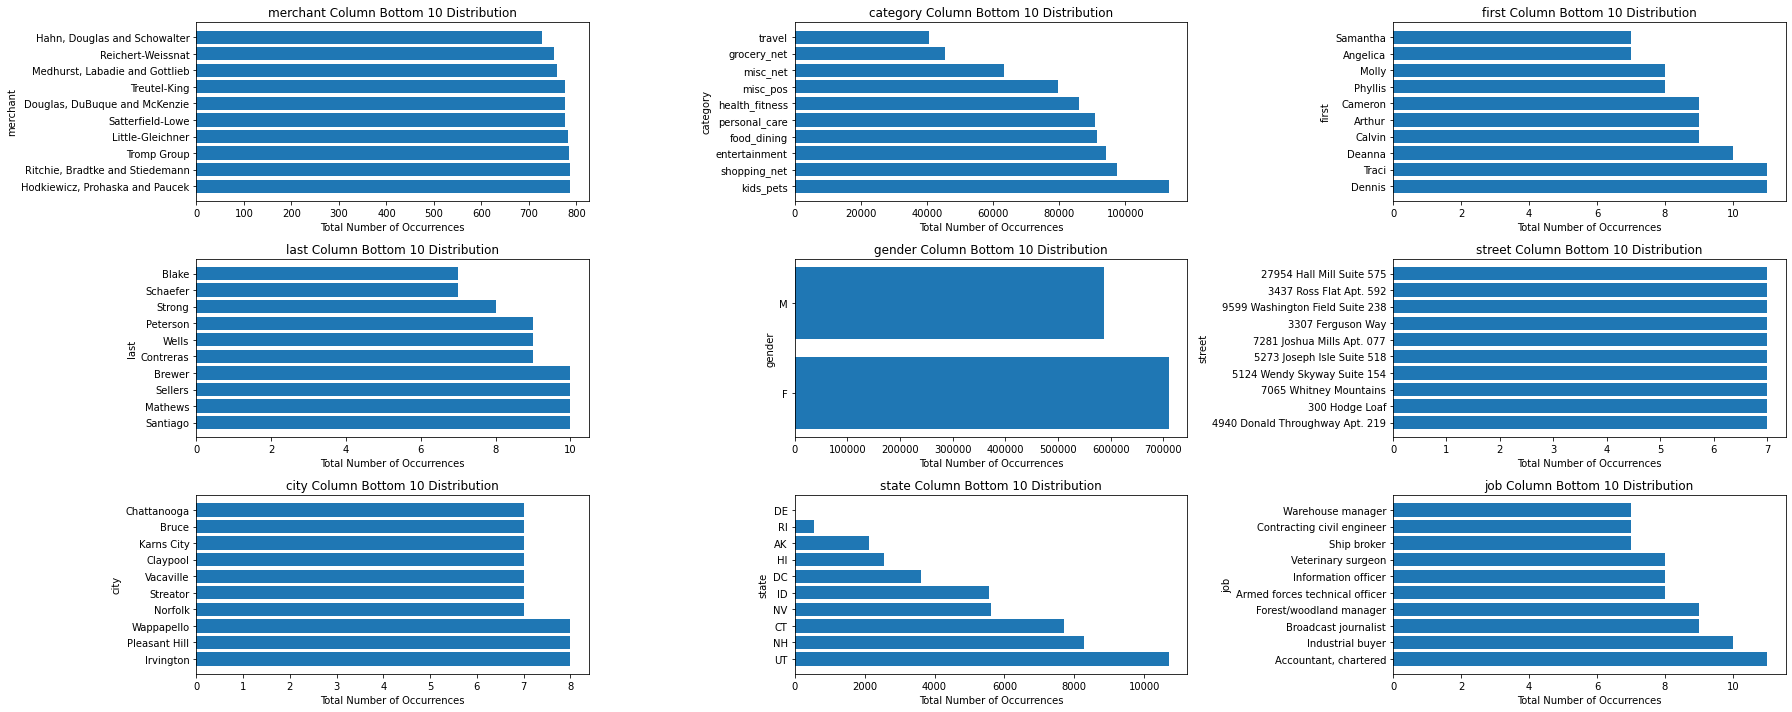

In [234]:
# For the bottom 10 categorical variables based on their value counts

plt.subplots(3,3, figsize=(25,10))

for slot_num, each_col in enumerate(categorical_columns, start=1):

  plt.subplot(3,3,slot_num)
  plt.barh(categorical_columns[each_col].value_counts().tail(10).index,
           categorical_columns[each_col].value_counts().tail(10).values)
  
  plt.xlabel("Total Number of Occurrences")
  plt.ylabel(each_col)
  plt.title(f"{each_col} Column Bottom 10 Distribution")

plt.tight_layout()
plt.show()

### Findings From Categorical Columns

There are a few merchants that are frequently used by the customers in the dataset. The category with the highest number of occurrence is transactions on gas under the transport category, followed by groceries, using the POS machine. There are a few common first and last names (like Christopher, Robert, Jessica, James, Smith, Williams, etc.) within the dataset. 

It also looks like females tend to make more transactions than men. There are a few street addresses and cities that have more occurrences than others. In this dataset, the top 5 states with the highest number of transaction occurrence is Texas, New York, Pennsylvania, California, and Ohio.

The top 5 job titles with the highest number of transaction occurrence is film/video editor, exhibition designer, naval architect, surveyor, and materials engineer. These jobs seem to require materials/props/artwork/equipment so it makes sens that they are the top 5.




---






## Univariate Analysis - Numeric Variables


Now that I have seen how the categorical variables are distributed and how much each variable occurs. I want to also explore all the numeric variables to observe how each numerical column is distributed.

In [235]:
# saving the numeric columns in one dataframe

numeric_df = cc_trans_df.select_dtypes(['float', 'int'])
numeric_df.shape

(1296675, 10)

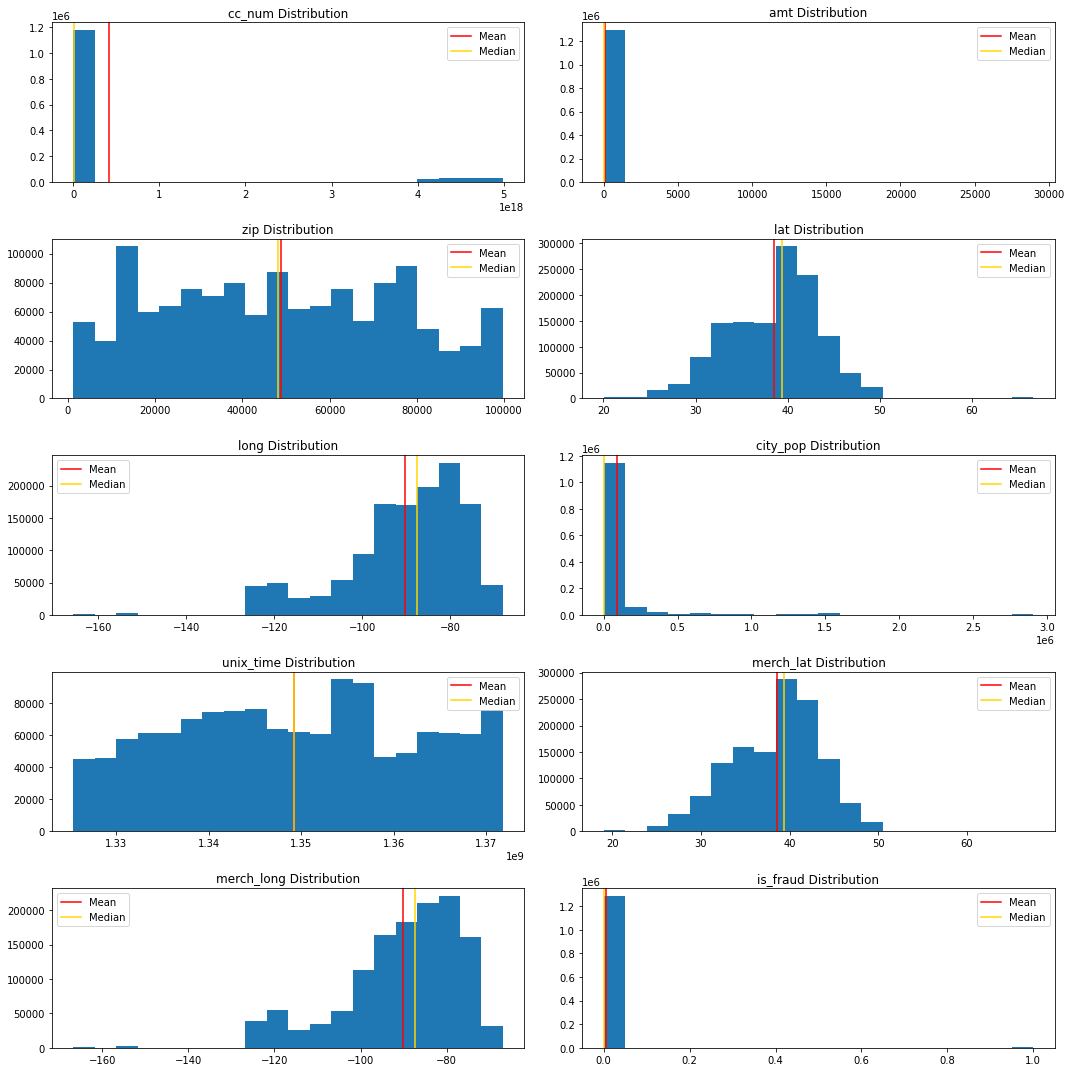

In [236]:
# Plot the distributions for the numeric variables

plt.subplots(5,2,figsize=(15,15))

for slot_num, each_col in enumerate(numeric_df.columns, start=1):
    
    plt.subplot(5,2,slot_num)
    plt.hist(numeric_df[each_col], bins=20)
    
    plt.title(f'{each_col} Distribution')
    
    plt.axvline(numeric_df[each_col].mean(), c='red', label='Mean')
    plt.axvline(numeric_df[each_col].median(), c='gold', label='Median')
    
    plt.legend()
    
plt.tight_layout()

plt.show()

In [237]:
# Check to see if there are any correlations with the numeric variables

numeric_df.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,-0.005078,0.001741,0.001721,1.000000


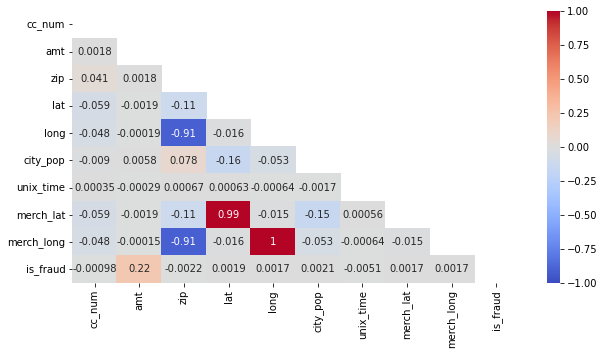

In [238]:
# See if there are any correlations between the numeric variables

corr_mat = numeric_df.corr()
mask = np.triu(corr_mat)

#Creating a heatmap
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(corr_mat, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

There is some correlation with the amount of transaction and if the transaction is fraudulent or not. There is also correlation between the latitude and longitude of the customer and the latitude and longitude of the merchant store. Which makes sense if the customer's credit card is used in close proximity to their location. There is correlation with the different columns representing location.

---

Now that I have observed the distribution of the numeric variables, I want to observe the relationship between the features (every column except the `is_fraud` column) and the target (the `is_fraud` column). I will do this by performing bivariate analysis.

# Pre-Processing and Feature Engineering on Each Column

As seen earlier, there are 10 columns containing categorical variables. These columns will need to be converted to numerical variables prior to modeling. Since `is_fraud` column is the target, I will be analyzing this column with the independent variables to see which categories have insignificant occurrences of fraud.

There are over 1M rows with 99.4% being non_fraudulent and 0.6% being fraudulent. So the goal is to bring up the percentage of fraudulent transactions by reducing the percentage of non_fraudulent transactions without removing vital information.

The goal with looking at each independent variable against the dependent variable is to remove categories that don't have any fraudulent transactions.

In [239]:
# See the data

cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


## `merchant` Column
Dropping merchants that don't contribute to the prediction of fraudulent transactions.

**Step 1: Get total number of occurrences for each merchant**

In [240]:
# Finding total number of occurrences for each merchant
cc_trans_df['merchant'].value_counts()

Kilback LLC                       4403
Cormier LLC                       3649
Schumm PLC                        3634
Kuhn LLC                          3510
Boyer PLC                         3493
                                  ... 
Douglas, DuBuque and McKenzie      775
Treutel-King                       775
Medhurst, Labadie and Gottlieb     759
Reichert-Weissnat                  753
Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

**Step 2: Group the `merchant` column and `is_fraud` column to see the total number of fraudulent transactions for each merchant.**

In [241]:
# Group, unstack and sort by fraudulent transactions in descending order
merchant_fraud = cc_trans_df.groupby(['merchant', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)
merchant_fraud

is_fraud,0,1
merchant,,
Rau and Sons,2441.0,49.0
Kozey-Boehm,1818.0,48.0
Cormier LLC,3601.0,48.0
Doyle Ltd,2511.0,47.0
Vandervort-Funk,2427.0,47.0
...,...,...
"Ritchie, Bradtke and Stiedemann",786.0,NaN
Romaguera and Sons,838.0,NaN
Schroeder Group,1675.0,NaN


I can see here that there are some NaNs for fraudulent transactions for some merchants, which means that some merchants did not have any fraudulent transactions and they won't be relevant in my model to predict fraudulent transactions.

**Step 3: Inspect the NaNs for fraudulent transactions**

In [242]:
# Total number of no fraudulent transactions for merchants
merchant_fraud[1].isna().sum()

14

In [243]:
# Show merchants that have no fraudulent transactions
merchant_fraud[merchant_fraud[1].isna()]

is_fraud,0,1
merchant,,
Funk Group,883.0,NaN
Gulgowski LLC,2513.0,NaN
"Hodkiewicz, Prohaska and Paucek",787.0,NaN
"Larson, Quitzon and Spencer",821.0,NaN
McKenzie-Huels,1846.0,NaN
Osinski Inc,1821.0,NaN
"Parker, Nolan and Trantow",1984.0,NaN
Paucek-Wiza,918.0,NaN
Reichert-Weissnat,753.0,NaN


In [244]:
# Total number of transactions for merchants with no fraudulent transactions
merchant_fraud[(merchant_fraud[1].isna())][0].sum()

17348.0

**There are 14 merchants out of 693 merchants, with 17,348 rows that don't have any fraudulent transactions. These rows will be dropped as it has no vital information (in terms of fraudulent transactions).**

**Step 4: Dropping some rows that might not be relevant to the performance of the model**

In [245]:
# Putting the merchant names to be dropped in a list to find the index
merchant_rows_to_drop = merchant_fraud[merchant_fraud[1].isna()].index.tolist()
merchant_rows_to_drop

['Funk Group',
 'Gulgowski LLC',
 'Hodkiewicz, Prohaska and Paucek',
 'Larson, Quitzon and Spencer',
 'McKenzie-Huels',
 'Osinski Inc',
 'Parker, Nolan and Trantow',
 'Paucek-Wiza',
 'Reichert-Weissnat',
 'Ritchie, Bradtke and Stiedemann',
 'Romaguera and Sons',
 'Schroeder Group',
 'Schroeder, Wolff and Hermiston',
 'Wiegand-Lowe']

In [246]:
# Checking to make sure the right number of merchants were included
len(merchant_rows_to_drop)

14

In [247]:
# Put indexes of the merchants in a list

list_of_indexes = []

for merchant in merchant_rows_to_drop:
  list_of_indexes.append(cc_trans_df[cc_trans_df['merchant'] == merchant].index.tolist())

len(list_of_indexes)

14

The `list_of_indexes` appears to be a list of lists, in order to drop each of these rows, I'd need to flatten the list of lists to just one list of all the indexes to be dropped. To do this, I found a code on Stack Overflow that can help with this.


Reference for flattening the list:
https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists

In [248]:
# Flatten the list of lists

flat_list_of_indexes = [item for sublist in list_of_indexes for item in sublist]

In [249]:
# Checking to make sure it worked

len(flat_list_of_indexes)

17348

In [250]:
# Dropping the rows

cc_trans_df.drop(index=flat_list_of_indexes, inplace=True)

**Step 5: Checking to make sure it is dropped appropriately**

In [251]:
cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [252]:
# Checking the new shape


cc_trans_df.shape

(1279327, 21)

In [253]:
# Checking to make sure there are still no NaNs

cc_trans_df.isna().sum().sum()

0

In [254]:
# Checking to make sure there are still no duplicates

cc_trans_df.duplicated().sum()

0

In [255]:
# Testing to make sure there are no NaNs when grouping the merchants with the occurrences of fraud

merchant_fraud_tester = cc_trans_df.groupby(['merchant', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

In [256]:
# Checking for NaNs

merchant_fraud_tester[1].isna().sum()

0

**Step 5: See if there is more opportunity to remove more rows**

---


**Why am I doing this?**

Initially, I only removed rows that had no fraudulent occurrences and moved on to pre-processing (converting categorical to numeric) and modeling. The modeling was taking too long to run due to the size of the dataset. So, I decided to come back to pre-processing here to remove low occurrences of fraud in the merchants.

In [257]:
merchant_fraud = cc_trans_df.groupby(['merchant', 'is_fraud']).count()['amt'].unstack().sort_values(by=0, ascending=False)
merchant_fraud

is_fraud,0,1
merchant,,
Kilback LLC,4356,47
Schumm PLC,3603,31
Cormier LLC,3601,48
Kuhn LLC,3466,44
Boyer PLC,3453,40
...,...,...
Satterfield-Lowe,773,3
Treutel-King,773,2
"Douglas, DuBuque and McKenzie",772,3


In [258]:
# Checking merchants with less than 5 fraudulent occurrences

merchant_fraud[merchant_fraud[1] < 5].count()

is_fraud
0    278
1    278
dtype: int64

In [259]:
# Checking the total number of rows 

merchant_fraud[merchant_fraud[1] < 5].sum()

is_fraud
0    449841
1       730
dtype: int64

In [260]:
cc_trans_df['is_fraud'].value_counts()

0    1271821
1       7506
Name: is_fraud, dtype: int64

If I dropped merchants that had less than 5 fraud occurrences, it would reduce the dataset by 449,841 rows of non-fraudulent transactions out of 1,271,821 rows, and only 730 fraudulent transactions out of 7,506 rows.


---

I initially went with only dropping merchants with less than 5 fraud occurrences, but the models were still taking too long or crashing due to the size of the dataset. So, I decided to check for merchants with less than 10 fraudulent occurrences to see if those can be dropped to increase the percentage of fraudulent transactions in the dataset by dropping more of the non-fraudulent transactions. I can see that there are occurrences of 30 - almost 50 fraudulent transactions for merchants, so less than 10 occurrences seemed safe to drop for this category.

In [261]:
# Checking merchants with less than 10 fraudulent occurrences

merchant_fraud[merchant_fraud[1] < 10].count()

is_fraud
0    438
1    438
dtype: int64

In [262]:
# Checking the total number of rows 

merchant_fraud[merchant_fraud[1] < 10].sum()

is_fraud
0    758779
1      1719
dtype: int64

In [263]:
# To see the merchants that will be dropped

merchant_fraud[merchant_fraud[1] < 10]

is_fraud,0,1
merchant,,
Dickinson Ltd,3426,8
Berge LLC,2668,9
"Raynor, Reinger and Hagenes",2612,9
"Kutch, Hermiston and Farrell",2604,9
Sporer Inc,2588,5
...,...,...
Satterfield-Lowe,773,3
Treutel-King,773,2
"Douglas, DuBuque and McKenzie",772,3


In [264]:
# Putting the names of the merchants to be dropped in a list

merchant_to_be_dropped = merchant_fraud[merchant_fraud[1] < 10].index.tolist()

len(merchant_to_be_dropped)

438

In [265]:
# Putting the indices of the names of merchants to be dropped in a list

list_of_indexes = []

for merchant in merchant_to_be_dropped:
  list_of_indexes.append(cc_trans_df[cc_trans_df['merchant'] == merchant].index.tolist())

In [ ]:
# Checking to make sure the numbers are the same (sanity check)

len(list_of_indexes)

In [ ]:
# Checking that the total number of rows to be dropped
# is the same as what was discovered above
# Should be 758,779 + 1,719 = 760,498

flat_list_of_indexes = [item for sublist in list_of_indexes for item in sublist]

len(flat_list_of_indexes)

In [ ]:
# Dropping the rows

cc_trans_df.drop(index=flat_list_of_indexes, inplace=True)

In [ ]:
# Checking the new shape of the dataset

cc_trans_df.shape

**The new shape of the dataset is 518,829 rows and 21 columns.**

In [ ]:
# See the dataset

cc_trans_df.head()

In [ ]:
# Checking the new class distribution

cc_trans_df['is_fraud'].value_counts()

The initial class distribution was 1,271,821 for non-fraudulent and 7,506 for fraudulent. The new class distribution dropped 758,779 rows for non-fraudulent and only 1,719 for fraudulent.

In [ ]:
# Looking at the new value counts for the merchants

cc_trans_df['merchant'].value_counts()

The initial length of the merchants (total number of merchants) was 693, now it is at 241, reducing the number of columns needed to be transformed to numeric columns by 452.

---

**The rest of the merchant column will be encoded using OneHotEncoder prior to modeling**

## `category` Column Pre-Processing

The same process that was done for the `merchant` column will be done for the `category` column as well.

**Step 1: Get total number of occurrences for each category**

In [ ]:
# Finding total number of occurrences for each category

cc_trans_df.groupby(['category', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

**Step 2: Group the `category` column and `is_fraud` column to see the total number of fraudulent transactions for each category.**

In [ ]:
# Group, unstack and sort by fraudulent transactions in descending order

category_fraud = cc_trans_df.groupby(['category', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

In [ ]:
# Checking total rows of categories with less than 10 fraudulent occurrences

category_fraud[category_fraud[1] < 10].sum()

In [ ]:
# The total number of categories that will be dropped

category_fraud[category_fraud[1] < 10].count()

In [266]:
category_to_be_dropped = category_fraud[category_fraud[1] < 10].index.tolist()

len(category_to_be_dropped)

0

In [ ]:
list_of_indexes = []

for category in category_to_be_dropped:
  list_of_indexes.append(cc_trans_df[cc_trans_df['category'] == category].index.tolist())

In [267]:
len(list_of_indexes)

438

In [268]:
flat_list_of_indexes = [item for sublist in list_of_indexes for item in sublist]

len(flat_list_of_indexes)

760498

In [269]:
cc_trans_df.drop(index=flat_list_of_indexes, inplace=True)

cc_trans_df.shape

(518829, 21)

In [270]:
cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
5,2019-01-01 00:04:08,4767265376804500,"Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,1325376248,40.653382,-76.152667,0
7,2019-01-01 00:05:08,6011360759745864,Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,1325376308,38.948089,-78.540296,0
9,2019-01-01 00:06:01,2720830304681674,"Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,1325376361,37.179198,-87.485381,0


In [271]:
cc_trans_df.groupby(['category', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

is_fraud,0,1
category,,
grocery_pos,121895,1743
shopping_net,95830,1713
misc_net,62372,915
shopping_pos,111208,827
gas_transport,110421,553
misc_pos,3254,12
entertainment,1974,10
food_dining,1865,7
health_fitness,3414,4


In [272]:
category_fraud = cc_trans_df.groupby(['category', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

In [273]:
category_fraud

is_fraud,0,1
category,,
grocery_pos,121895,1743
shopping_net,95830,1713
misc_net,62372,915
shopping_pos,111208,827
gas_transport,110421,553
misc_pos,3254,12
entertainment,1974,10
food_dining,1865,7
health_fitness,3414,4


## `first` and `last` Columns Pre-Processing

In [274]:
# Finding total number of occurrences for each first names

cc_trans_df.groupby(['first', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

is_fraud,0,1
first,,
Christopher,10407.0,144.0
Robert,8630.0,141.0
David,7592.0,125.0
James,7807.0,105.0
Michael,7522.0,98.0
...,...,...
Spencer,375.0,NaN
Tommy,199.0,NaN
Vanessa,385.0,NaN


There are some first names that don't have any association with fraudulent transactions, and might not be useful for the model. I'm going to further explore and see if those rows can be removed.

In [275]:
# Group, unstack and sort by fraudulent transactions in descending order

first_fraud = cc_trans_df.groupby(['first', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

In [ ]:
# Finding sum of rows with first names that have no fraudulent occurrences

first_fraud[first_fraud[1].isna()].sum()

In [276]:
# Finding total number of names with no fraudulent occurrences

first_fraud[first_fraud[1].isna()].count()

is_fraud
0    40
1     0
dtype: int64

### Dropping some `first` column rows

In [277]:
# Bringing the table back

first_fraud[first_fraud[1].isna()]

is_fraud,0,1
first,,
Alyssa,585.0,NaN
Ana,2302.0,NaN
April,842.0,NaN
Beth,830.0,NaN
Brent,650.0,NaN
Catherine,549.0,NaN
Christian,1345.0,NaN
Connor,187.0,NaN
Crystal,2175.0,NaN


In [278]:
# Putting the names in a list

first_fraud[first_fraud[1].isna()].index.tolist()

['Alyssa',
 'Ana',
 'April',
 'Beth',
 'Brent',
 'Catherine',
 'Christian',
 'Connor',
 'Crystal',
 'Curtis',
 'Dalton',
 'Debbie',
 'Deborah',
 'Erica',
 'Erin',
 'Frederick',
 'Haley',
 'Jenna',
 'Julia',
 'Keith',
 'Laura',
 'Marcia',
 'Mario',
 'Melinda',
 'Melody',
 'Melvin',
 'Michele',
 'Mike',
 'Morgan',
 'Peggy',
 'Renee',
 'Ricky',
 'Roberta',
 'Ruth',
 'Sonya',
 'Spencer',
 'Tommy',
 'Vanessa',
 'Veronica',
 'Wesley']

In [279]:
first_to_be_dropped = first_fraud[first_fraud[1].isna()].index.tolist()
len(first_to_be_dropped)

40

In [280]:
list_of_indexes_first = []

for name in first_to_be_dropped:
  list_of_indexes_first.append(cc_trans_df[cc_trans_df['first'] == name].index.tolist())

In [281]:
flat_list_first = [item for sublist in list_of_indexes_first for item in sublist]
len(flat_list_first)

30858

In [282]:
# Dropping the first names with no fraudulent occurrences

cc_trans_df.drop(index=flat_list_first, inplace=True)

# Checking the new shape of the dataset
cc_trans_df.shape

(487971, 21)

#### Checking to make sure rows were dropped appropriately

In [283]:
cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
5,2019-01-01 00:04:08,4767265376804500,"Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,1325376248,40.653382,-76.152667,0
7,2019-01-01 00:05:08,6011360759745864,Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,1325376308,38.948089,-78.540296,0
9,2019-01-01 00:06:01,2720830304681674,"Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,1325376361,37.179198,-87.485381,0


In [284]:
cc_trans_df.isna().sum().sum()

0

In [285]:
cc_trans_df.duplicated().sum()

0

#### Checking to see if more `first` names can be dropped

Similar to what happened for the `merchant` column, I needed to find more opportunities to drop more rows that had low fraudulent occurrences to make my model run faster and also to increase the model's sensitivity to the patterns of fraudulent transactions.

In [ ]:
cc_trans_df.groupby(['first', 'is_fraud']).count()['amt'].unstack().sort_values(by=0, ascending=False)

In [286]:
another_first_fraud = cc_trans_df.groupby(['first', 'is_fraud']).count()['amt'].unstack().sort_values(by=0, ascending=False)

In [287]:
another_first_fraud[another_first_fraud[1] < 5]

is_fraud,0,1
first,,
Kayla,3071.0,4.0
Sara,2471.0,1.0
Cassandra,1326.0,4.0
Edward,1310.0,4.0
Kathryn,1303.0,4.0
Jill,1179.0,3.0
Breanna,1077.0,3.0
Ann,979.0,2.0
Taylor,912.0,4.0


In [288]:
another_first_fraud[another_first_fraud[1] < 5].count()

is_fraud
0    22
1    22
dtype: int64

In [289]:
another_first_fraud[another_first_fraud[1] < 5].sum()

is_fraud
0    19406.0
1       69.0
dtype: float64

In [290]:
another_first_fraud[another_first_fraud[1] < 10]

is_fraud,0,1
first,,
Lauren,4114.0,6.0
Barbara,3538.0,8.0
Kayla,3071.0,4.0
Gina,2618.0,7.0
Sara,2471.0,1.0
...,...,...
Deanna,NaN,9.0
Molly,NaN,7.0
Phyllis,NaN,6.0


I notice that there are some first names only have fraudulent transactions, so I need to make sure that those are kept and only focus on dropping rows that have significantly more non-fraudulent occurrences than fraudulent transactions.

In [291]:
# Filtering out the first names that ONLY have fraudulent occurrences

another_first_fraud[(another_first_fraud[1] < 10) & (~another_first_fraud[0].isna())]

is_fraud,0,1
first,,
Lauren,4114.0,6.0
Barbara,3538.0,8.0
Kayla,3071.0,4.0
Gina,2618.0,7.0
Sara,2471.0,1.0
...,...,...
Natalie,201.0,8.0
Tabitha,194.0,7.0
Angie,191.0,5.0


In [292]:
# Getting the total names to be dropped

another_first_fraud[(another_first_fraud[1] < 10) & (~another_first_fraud[0].isna())].count()

is_fraud
0    111
1    111
dtype: int64

In [293]:
# Total rows to be dropped

another_first_fraud[(another_first_fraud[1] < 10) & (~another_first_fraud[0].isna())].sum()

is_fraud
0    94809.0
1      696.0
dtype: float64

Looking at the total rows to be dropped with first names that have less than 10 occurrences, it doesn't seem like a lot. So, I decided to increase the occurrence to be less than 15 instead of 10 because there are fraudulent occurrences that are in the 100s.

In [294]:
another_first_fraud[(another_first_fraud[1] < 15) & (~another_first_fraud[0].isna())].sum()

is_fraud
0    170599.0
1      1503.0
dtype: float64

This is more significant. 168,613 rows of non-fraudulent transactions will be dropped out of 476,425, and only 1,500 fraudulent transactions will be dropped out of 5,773.

In [295]:
# Checking the original class distribution

cc_trans_df['is_fraud'].value_counts()

0    482184
1      5787
Name: is_fraud, dtype: int64

In [296]:
dropping_first = another_first_fraud[(another_first_fraud[1] < 15) & (~another_first_fraud[0].isna())].index.tolist()
len(dropping_first)

182

In [297]:
list_of_indexes_first = []

for name in dropping_first:
  list_of_indexes_first.append(cc_trans_df[cc_trans_df['first'] == name].index.tolist())

In [ ]:
len(list_of_indexes_first)

In [ ]:
flat_list_first = [item for sublist in list_of_indexes_first for item in sublist]
len(flat_list_first)

In [ ]:
# Checking the new shape of the dataset

cc_trans_df.drop(index=flat_list_first, inplace=True)
cc_trans_df.shape

In [298]:
# Checking the new class distribution

cc_trans_df.is_fraud.value_counts()

0    482184
1      5787
Name: is_fraud, dtype: int64

### Dropping some `last` column rows


In [299]:
last_fraud = cc_trans_df.groupby(['last', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)
last_fraud

is_fraud,0,1
last,,
Johnson,7349.0,135.0
Martinez,6048.0,107.0
Smith,10472.0,106.0
Davis,8915.0,97.0
Jones,5122.0,94.0
...,...,...
Waller,879.0,NaN
Walsh,439.0,NaN
Waters,388.0,NaN


In [300]:
last_to_be_dropped = last_fraud[last_fraud[1].isna()].index.tolist()
len(last_to_be_dropped)

50

In [301]:
list_of_indexes_last = []

for name in last_to_be_dropped:
  list_of_indexes_last.append(cc_trans_df[cc_trans_df['last'] == name].index.tolist())

In [302]:
len(list_of_indexes_last)

50

In [303]:
flat_list_last = [item for sublist in list_of_indexes_last for item in sublist]
len(flat_list_last)

28521

In [304]:
cc_trans_df.shape

(487971, 21)

In [305]:
cc_trans_df.drop(index=flat_list_last, inplace=True)
cc_trans_df.shape

(459450, 21)

In [306]:
cc_trans_df.is_fraud.value_counts()

0    453663
1      5787
Name: is_fraud, dtype: int64

#### Checking to make sure it was dropped appropriately (last names)

In [307]:
cc_trans_df.isna().sum().sum()

0

In [308]:
cc_trans_df.duplicated().sum()

0

Last names are a bit more unique than first names, so I will not try to find ways to reduce the rows even more using the last names.

## `gender` Column Pre-Processing

In [309]:
cc_trans_df.groupby(['gender', 'is_fraud']).count()['amt']

gender  is_fraud
F       0           246445
        1             2531
M       0           207218
        1             3256
Name: amt, dtype: int64

For the `gender` column, since there are only 2 categories, with potentially useful information, this column will be encoded using OHE.

## `street` Column

In [ ]:
cc_trans_df.groupby(['street','is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

In [310]:
street_fraud = cc_trans_df.groupby(['street','is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

In [311]:
street_fraud[street_fraud[1].isna()]

is_fraud,0,1
street,,
00315 Ashley Valleys,348.0,NaN
01892 Patricia Vista Apt. 828,1010.0,NaN
033 Tara Brook Suite 523,660.0,NaN
0356 Sarah Light,620.0,NaN
0495 Baker Manors,423.0,NaN
...,...,...
9579 Porter Tunnel,397.0,NaN
96122 Steven Flat,192.0,NaN
9795 Lori Island Suite 346,664.0,NaN


In [312]:
street_to_be_dropped = street_fraud[street_fraud[1].isna()].index.tolist()
len(street_to_be_dropped)

124

In [313]:
list_of_indexes_street = []

for name in street_to_be_dropped:
  list_of_indexes_street.append(cc_trans_df[cc_trans_df['street'] == name].index.tolist())

# Sanity check
print(len(list_of_indexes_street))

124


In [314]:
flat_list_street = [item for sublist in list_of_indexes_street for item in sublist]
len(flat_list_street)

72244

In [315]:
cc_trans_df.shape

(459450, 21)

In [316]:
cc_trans_df.drop(index=flat_list_street, inplace=True)
cc_trans_df.shape

(387206, 21)

#### Checking to make sure it was dropped appropriately (street)

In [ ]:
cc_trans_df.isna().sum().sum()

In [317]:
cc_trans_df.duplicated().sum()

0

In [318]:
cc_trans_df['is_fraud'].value_counts()

0    381419
1      5787
Name: is_fraud, dtype: int64

## `city` Columns

In [319]:
city_fraud = cc_trans_df.groupby(['city', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

In [320]:
city_fraud[city_fraud[1] < 5].count()

is_fraud
0    101
1    101
dtype: int64

In [321]:
city_fraud[city_fraud[1] < 5].sum()

is_fraud
0    68133.0
1      302.0
dtype: float64

In [322]:
city_fraud[city_fraud[1] < 10].count()

is_fraud
0    427
1    469
dtype: int64

In [323]:
city_fraud[city_fraud[1] < 10]

is_fraud,0,1
city,,
Schaefferstown,703.0,9.0
Parkers Lake,418.0,9.0
Stephensport,619.0,9.0
De Lancey,168.0,9.0
Ridge Spring,NaN,9.0
...,...,...
Scotland,1137.0,1.0
Westhampton Beach,388.0,1.0
Bethel,201.0,1.0


In [324]:
city_fraud[(city_fraud[1] < 10) & (~city_fraud[0].isna())].count()

is_fraud
0    427
1    427
dtype: int64

In [325]:
city_fraud[(city_fraud[1] < 10) & (~city_fraud[0].isna())].sum()

is_fraud
0    242586.0
1      2622.0
dtype: float64

In [326]:
cc_trans_df['is_fraud'].value_counts()

0    381419
1      5787
Name: is_fraud, dtype: int64

### Dropping some city columns

I'll drop the city that has less than 5 instances of fraudulent transactions, instead of 10.

In [327]:
city_fraud[city_fraud[1] < 5].sum()

is_fraud
0    68133.0
1      302.0
dtype: float64

In [328]:
city_fraud[city_fraud[1] < 5].count()

is_fraud
0    101
1    101
dtype: int64

In [329]:
city_to_be_dropped = city_fraud[city_fraud[1] < 5].index.tolist()
len(city_to_be_dropped)

101

In [330]:
list_of_indexes_city = []

for city in city_to_be_dropped:
  list_of_indexes_city.append(cc_trans_df[cc_trans_df['city'] == city].index.tolist())

# Sanity check
len(list_of_indexes_city)

101

In [331]:
flat_list_city = [item for sublist in list_of_indexes_city for item in sublist]
len(flat_list_city)

68435

In [332]:
cc_trans_df.drop(index=flat_list_city, inplace=True)
cc_trans_df.shape

(318771, 21)

In [333]:
cc_trans_df['is_fraud'].value_counts()

0    313286
1      5485
Name: is_fraud, dtype: int64

## `state` Columns

In [334]:
cc_trans_df.groupby(['state', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

is_fraud,0,1
state,,
NY,18352.0,397.0
TX,21936.0,349.0
PA,17903.0,326.0
CA,12671.0,248.0
OH,12217.0,239.0
FL,12344.0,205.0
MI,12014.0,178.0
AL,9912.0,159.0
MN,8251.0,152.0


In [335]:
state_fraud = cc_trans_df.groupby(['state', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

There is no evidence showing that the rows for the `state` columns can be dropped, due to the fact that the unique states are significantly less than the merchant, first, last, and state columns. So for now, the `state` column will be OHE. If need be, I can come back to it to see if there are ways to reduce the rows.

## `job` Column Pre-processing

In [336]:
cc_trans_df.groupby(['job', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

is_fraud,0,1
job,,
Materials engineer,2063.0,46.0
Trading standards officer,1291.0,45.0
Exhibition designer,3614.0,43.0
Mechanical engineer,2137.0,43.0
Audiological scientist,2279.0,41.0
...,...,...
Product/process development scientist,876.0,4.0
Herbalist,590.0,4.0
Colour technologist,199.0,4.0


In [ ]:
job_fraud = cc_trans_df.groupby(['job', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)

I notice that there are a lot of duplicated general job titles (like engineer, designer, scientist, technologist, etc) that are used throughout the dataset, but these general job titles are embedded with specific specializations, like materials engineer, multimedia designer, etc. So, I decided to separate the column by the comma (,) which is used to separate the specialization from the general job title.

In [337]:
# Separate the job titles by comma (,)

cc_trans_df['job'].str.split(',', expand=True)

,0,1
5,Transport planner,None
7,Designer,multimedia
9,Pathologist,None
10,IT trainer,None
11,Systems developer,None
...,...,...
1296631,Public relations account executive,None
1296634,Special effects artist,None
1296639,Occupational psychologist,None
1296640,Higher education careers adviser,None


In [338]:
# Only including the first part of the separation 
# which should be the general job titles for SOME jobs

cc_trans_df['job'] = cc_trans_df['job'].str.split(',', expand=True)[0]
cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
5,2019-01-01 00:04:08,4767265376804500,"Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,1325376248,40.653382,-76.152667,0
7,2019-01-01 00:05:08,6011360759745864,Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,22824,38.8432,-78.6003,6018,Designer,1947-08-21,1325376308,38.948089,-78.540296,0
9,2019-01-01 00:06:01,2720830304681674,"Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,1325376361,37.179198,-87.485381,0
10,2019-01-01 00:06:23,4642894980163,Rutherford-Mertz,grocery_pos,24.74,Eddie,Mendez,M,1831 Faith View Suite 653,Clarinda,...,51632,40.7491,-95.0380,7297,IT trainer,1990-07-13,1325376383,40.275891,-96.011548,0
11,2019-01-01 00:06:53,377234009633447,Kerluke-Abshire,shopping_net,7.77,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,...,25442,39.3716,-77.8229,1925,Systems developer,1966-02-14,1325376413,40.103866,-78.624459,0


In [339]:
# Checking to make sure this worked

cc_trans_df['job'].value_counts()

Engineer                       10513
Scientist                       6569
Surveyor                        5762
Designer                        4555
Psychologist                    3692
                               ...  
Forest/woodland manager            7
Contracting civil engineer         7
Information officer                6
Warehouse manager                  6
Nature conservation officer        6
Name: job, Length: 352, dtype: int64

The original number of job titles was 335, the new number of job titles is 294. Meaning I was able to group 41 jobs together based on the general job titles. I can now see that Engineer has the most transactions, followed by Designer and Scentist.

---

Now, I can get back to looking at job titles with low fraudulent transactions occurrences.

In [340]:
job_fraud = cc_trans_df.groupby(['job', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)
job_fraud

is_fraud,0,1
job,,
Engineer,10320.0,193.0
Scientist,6453.0,116.0
Designer,4484.0,71.0
Surveyor,5703.0,59.0
Psychologist,3637.0,55.0
...,...,...
Manufacturing engineer,365.0,4.0
Colour technologist,199.0,4.0
Product/process development scientist,876.0,4.0


In [341]:
job_fraud[job_fraud[1] < 10].count()

is_fraud
0    113
1    128
dtype: int64

The count on both classes shows that there are some NaNs in class 0, so I need to filter those out because that might be helpful in the model's sensitivity to fraudulent transactions (if there are no occurrences to non-fraudulent transactions).

In [342]:
job_fraud[(job_fraud[1] < 10) & (~job_fraud[0].isna())].count()

is_fraud
0    113
1    113
dtype: int64

In [343]:
job_fraud[(job_fraud[1] < 10) & (~job_fraud[0].isna())].sum()

is_fraud
0    56900.0
1      768.0
dtype: float64

In [344]:
job_fraud[(job_fraud[1] < 15) & (~job_fraud[0].isna())].count()

is_fraud
0    189
1    189
dtype: int64

In [345]:
job_fraud[(job_fraud[1] < 15) & (~job_fraud[0].isna())].sum()

is_fraud
0    111013.0
1      1663.0
dtype: float64

In [346]:
cc_trans_df['is_fraud'].value_counts()

0    313286
1      5485
Name: is_fraud, dtype: int64

I decided to drop job titles that have less than 10 fraudulent occurrences as it has less rows to drop from the fraudulent class.

### Dropping some job columns

In [347]:
job_to_be_dropped = job_fraud[(job_fraud[1] < 10) & (~job_fraud[0].isna())].index.tolist()
len(job_to_be_dropped)

113

In [348]:
list_of_indexes_job = []

for job in job_to_be_dropped:
  list_of_indexes_job.append(cc_trans_df[cc_trans_df['job'] == job].index.tolist())

# Sanity check
len(list_of_indexes_job)

113

In [ ]:
flat_list_job = [item for sublist in list_of_indexes_job for item in sublist]
len(flat_list_job)

In [349]:
# drop the jobs

cc_trans_df.drop(index=flat_list_job, inplace=True)

# Check the new shape of the dataset
cc_trans_df.shape

(281267, 21)

In [350]:
# Checking the new class distribution

cc_trans_df['is_fraud'].value_counts()

0    276474
1      4793
Name: is_fraud, dtype: int64

I decided to go back and drop some more job titles, again due to the modeling process taking too long. So, I decided to go ahead and drop job titles that have less than 15 fraudulent occurrences.

In [351]:
job_fraud = cc_trans_df.groupby(['job', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)
job_fraud

is_fraud,0,1
job,,
Engineer,10320.0,193.0
Scientist,6453.0,116.0
Designer,4484.0,71.0
Surveyor,5703.0,59.0
Psychologist,3637.0,55.0
...,...,...
Sport and exercise psychologist,7.0,NaN
Structural engineer,2.0,NaN
Theatre director,6.0,NaN


In [352]:
job_fraud[(job_fraud[1] < 15) & (~job_fraud[0].isna())].count()

is_fraud
0    154
1    154
dtype: int64

In [353]:
job_fraud[(job_fraud[1] < 15) & (~job_fraud[0].isna())].sum()

is_fraud
0    88834.0
1     1189.0
dtype: float64

In [354]:
job_to_be_dropped = job_fraud[(job_fraud[1] < 15) & (~job_fraud[0].isna())].index.tolist()
len(job_to_be_dropped)

154

In [355]:
list_of_indexes_job = []

for job in job_to_be_dropped:
  list_of_indexes_job.append(cc_trans_df[cc_trans_df['job'] == job].index.tolist())

# Sanity check
len(list_of_indexes_job)

154

In [357]:
flat_list_job = [item for sublist in list_of_indexes_job for item in sublist]
len(flat_list_job)

90023

In [358]:
cc_trans_df.drop(index=flat_list_job, inplace=True)
cc_trans_df.shape

(191244, 21)

In [359]:
cc_trans_df['is_fraud'].value_counts()

0    187640
1      3604
Name: is_fraud, dtype: int64

### Job Data Visualization/EDA


Since the Job titles had changed (with grouping some of them into one general job title), I decided to conduct some visualizations on the new job titles.

In [360]:
job_fraud = cc_trans_df.groupby(['job', 'is_fraud']).count()['amt'].unstack().sort_values(by=1, ascending=False)
job_fraud

is_fraud,0,1
job,,
Engineer,10320.0,193.0
Scientist,6453.0,116.0
Designer,4484.0,71.0
Surveyor,5703.0,59.0
Psychologist,3637.0,55.0
...,...,...
Sport and exercise psychologist,7.0,NaN
Structural engineer,2.0,NaN
Theatre director,6.0,NaN


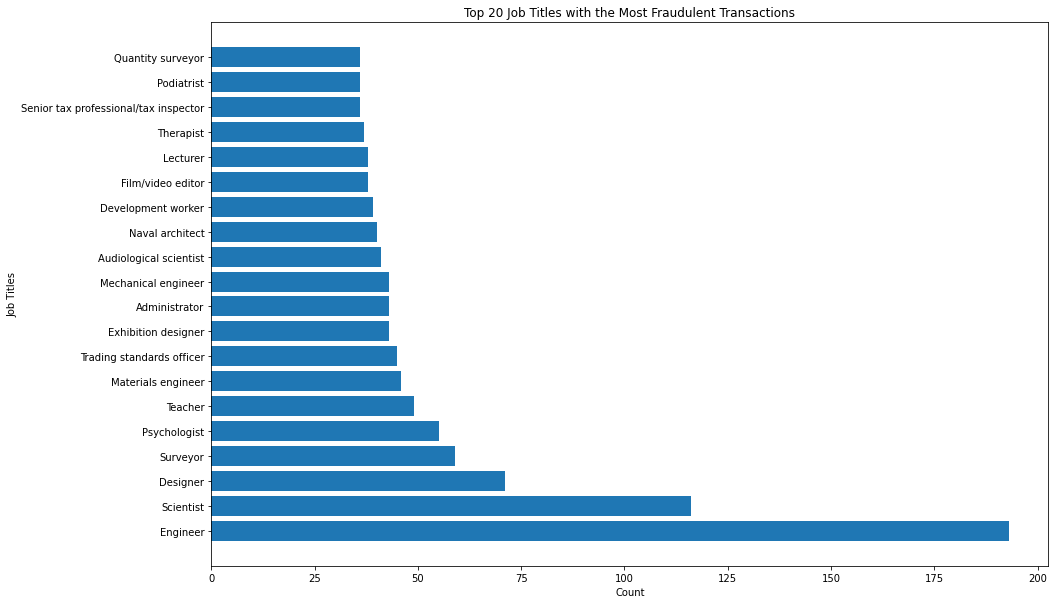

In [361]:
# Plot to see the top 20 job titles with the most fraudulent transactions

plt.figure(figsize=(15,10))
plt.barh(job_fraud.head(20).index,
         job_fraud[1].head(20))
plt.xlabel("Count")
plt.ylabel("Job Titles")
plt.title("Top 20 Job Titles with the Most Fraudulent Transactions")
plt.show()

Customers with "engineer" in their job titles have the most number of fraudulent transactions, significantly more than the others. After engineer, scientist, designer and trading standards officers also have high numbers of fraudulent transactions.

The rest of the `job` will be transformed to numeric using OHE.

In [362]:
# Checking the new dataset

cc_trans_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
5,2019-01-01 00:04:08,4767265376804500,"Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,1325376248,40.653382,-76.152667,0
7,2019-01-01 00:05:08,6011360759745864,Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,22824,38.8432,-78.6003,6018,Designer,1947-08-21,1325376308,38.948089,-78.540296,0
12,2019-01-01 00:06:56,180042946491150,Lockman Ltd,grocery_pos,71.22,Charles,Robles,M,3337 Lisa Divide,Saint Petersburg,...,33710,27.7898,-82.7243,341043,Engineer,1989-02-28,1325376416,27.630593,-82.308891,0
13,2019-01-01 00:07:27,5559857416065248,Kiehn Inc,grocery_pos,96.29,Jack,Hill,M,5916 Susan Bridge Apt. 939,Grenada,...,96038,41.6125,-122.5258,589,Systems analyst,1945-12-21,1325376447,41.657520,-122.230347,0
14,2019-01-01 00:09:03,3514865930894695,Beier-Hyatt,shopping_pos,7.77,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,1325376543,32.863258,-106.520205,0


In [363]:
# Checking the shape of the final dataset

cc_trans_df.shape

(191244, 21)

In [364]:
# Checking the class distribution of the final dataset

cc_trans_df.is_fraud.value_counts()

0    187640
1      3604
Name: is_fraud, dtype: int64


**The next notebook will be on final pre-processing of the dataset, mostly transforming the categorical columns to numeric columns.**

**First, I'll save this cleaned version for data visualization in Tableau.**

# Saving Cleaned Dataset into csv File

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
cc_trans_df.to_csv('cleaned_cc_trans_df.csv')
!cp cleaned_cc_trans_df.csv "/content/drive/MyDrive/Colab Notebooks/data"

# Summary

In this notebook, I prepared the dataset for exploration and conducted exploratory data analysis on the data. I also conducted feature engineering by analyzing the relationship between the dependent and independent variables. I did some pre-processing on the independent variables, removing rows with little to no fraudulent occurrences to potentially increase the model's sensitivity to fraudulent transactions (increasing the percentage of Class 1), and also to make fitting models faster with a smaller dataset.

In the next notebook: **'Tolulope_Oludemi - Notebook #2 - Pre-Processing'**, I will be transforming the categorical columns to numeric, preparing this cleaned dataset to be model ready.